#  Автоэнкодеры

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.eecs.qmul.ac.uk/~sgg/_ECS795P_/papers/WK07-8_PyTorch_Tutorial2.html
* https://www.youtube.com/watch?v=zp8clK9yCro
* https://medium.com/@rekalantar/variational-auto-encoder-vae-pytorch-tutorial-dce2d2fe0f5f
* https://towardsdatascience.com/conditional-variational-autoencoders-with-learnable-conditional-embeddings-e22ee5359a2a
* https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#sphx-glr-auto-examples-others-plot-visualization-utils-py

## Задачи для совместного разбора

1\. Обсудите основные шаги в обучении автокодировщиков.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите набор данных MNIST из пакета `torchvision` (данный набор уже разбит на обучающее и тестовое множество).

Создайте и обучите модель автокодировщика, используя только полносвязные слои и функции активации.

Кодировщик - это функция вида
$z = f_\theta(x)$
,где $\theta$ - это параметры кодировщика.

Декодировщик - это функция вида
$\hat{x} = g_\phi(z)$
,где $\phi$ - это параметры декодировщика.

В нашем случае оба компонента представляют собой нейронные сети. Скрытое представление, полученное после части-кодировщика, должно иметь размерность 2. Последним слоем части-декодеровщика сделайте сигмоиду.

В качестве функции потерь используйте `MSELoss` между исходным и восстановленным изображением $MSE(x, \hat{x})$.

Обратите внимание, что во время обучения метки классов не используются.


- [ ] Проверено на семинаре

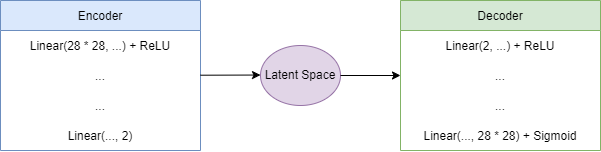

In [1]:
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
from torch import nn, optim
from tqdm import tqdm
import torch as th
import numpy as np

In [2]:
transform = Compose([ToTensor()])
train_dataset = MNIST(root='./../data/', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./../data/', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)
len(train_dataset), len(test_dataset)

(60000, 10000)

In [3]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)

In [6]:
optimizer = optim.AdamW(model.parameters(), lr=2e-4)
critertion = nn.MSELoss()

In [7]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    loss_train = 0
    for images, classes, in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} Train'):
        images = images.flatten(start_dim=1).to(device)

        out = model(images)

        loss = critertion(images, out)
        loss_train += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()
    loss_val = 0
    with th.no_grad():
        for images, classes, in tqdm(test_loader, desc=f'Epoch {epoch+1}/{num_epochs} Val'):
            images = images.flatten(start_dim=1).to(device)
            
            out = model(images)

            loss = critertion(images, out)
            loss_val += loss.item()
    
    print(f'  - Train Loss: {loss_train / len(train_loader):.4f} Val Loss: {loss_val / len(test_loader):.4f}')

Epoch 1/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1156.89it/s]


  - Train Loss: 0.0554 Val Loss: 0.0484


Epoch 2/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1155.92it/s]


  - Train Loss: 0.0466 Val Loss: 0.0450


Epoch 3/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1153.30it/s]


  - Train Loss: 0.0442 Val Loss: 0.0435


Epoch 4/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1155.71it/s]


  - Train Loss: 0.0427 Val Loss: 0.0422


Epoch 5/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1152.76it/s]


  - Train Loss: 0.0417 Val Loss: 0.0414


Epoch 6/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1155.19it/s]


  - Train Loss: 0.0409 Val Loss: 0.0408


Epoch 7/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1154.69it/s]


  - Train Loss: 0.0403 Val Loss: 0.0404


Epoch 8/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1153.50it/s]


  - Train Loss: 0.0399 Val Loss: 0.0399


Epoch 9/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1150.50it/s]


  - Train Loss: 0.0395 Val Loss: 0.0396


Epoch 10/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1154.38it/s]


  - Train Loss: 0.0391 Val Loss: 0.0393


Epoch 11/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1148.48it/s]


  - Train Loss: 0.0388 Val Loss: 0.0390


Epoch 12/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1152.36it/s]


  - Train Loss: 0.0386 Val Loss: 0.0388


Epoch 13/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1152.77it/s]


  - Train Loss: 0.0383 Val Loss: 0.0387


Epoch 14/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1155.26it/s]


  - Train Loss: 0.0381 Val Loss: 0.0384


Epoch 15/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1154.96it/s]


  - Train Loss: 0.0379 Val Loss: 0.0383


Epoch 16/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1150.94it/s]


  - Train Loss: 0.0377 Val Loss: 0.0381


Epoch 17/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1155.71it/s]


  - Train Loss: 0.0376 Val Loss: 0.0380


Epoch 18/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1149.98it/s]


  - Train Loss: 0.0374 Val Loss: 0.0380


Epoch 19/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1157.08it/s]


  - Train Loss: 0.0372 Val Loss: 0.0378


Epoch 20/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1155.63it/s]

  - Train Loss: 0.0371 Val Loss: 0.0377


<p class="task" id="2"></p>

2\. Получите один батч из тестового множества. Используя модель, обученную в предыдущем задании, получите скрытые представления для всех изображений из этого батча и визуализируйте на плоскости (они должны иметь размерность 2!). Раскрасьте точки в цвета, соответствующие меткам класса изображений (цифрам).

Возьмите одно изображение из тестового множества и пропустите его через обученный автокодировщик. Визуализируйте рядом (по горизонтали) два изображения: исходное и после восстановления автокодировщиком.


- [ ] Проверено на семинаре

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
images, classes = next(iter(test_loader))
images = images.flatten(start_dim=1).to(device)
encoder_out = model.encoder(images)
encoder_out

tensor([[ 5.0349,  9.4660],
        [-0.3783, 14.7172],
        [ 1.1529,  0.8060],
        [-7.5486,  7.4809],
        [-2.5000,  7.4302],
        [ 7.1926,  8.5320],
        [-2.5901, -0.3898],
        [-2.2221, -0.4261]], device='cuda:0', grad_fn=<AddmmBackward0>)

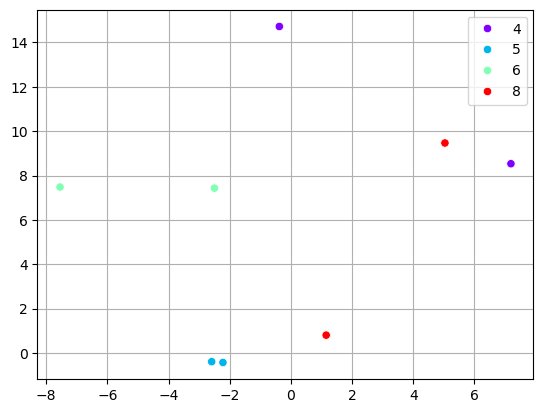

In [10]:
data_xy = encoder_out.cpu().detach().numpy()
classes_np = classes.cpu().numpy()
sns.scatterplot(x=data_xy[:, 0], y=data_xy[:, 1], hue=classes_np, palette='rainbow')
plt.grid(True)
plt.show()

In [11]:
image, label = test_dataset[0]
image_th = image.clone().to(device).flatten().unsqueeze(0)
out = model(image_th)

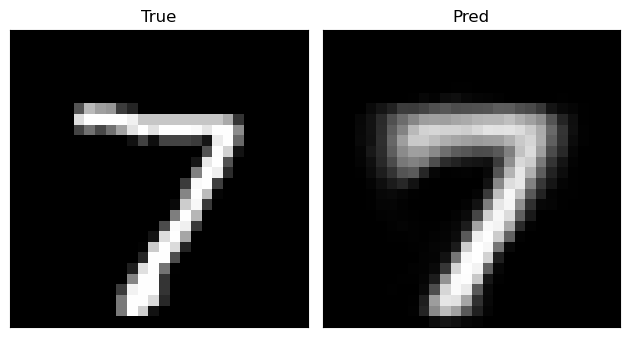

In [12]:
fig, ax = plt.subplots(1, 2)
for a in ax:
	a.set_xticks([])
	a.set_yticks([])
ax[0].set_title('True')
ax[1].set_title('Pred')
ax[0].imshow(image.permute(1, 2, 0), cmap='gray')
ax[1].imshow((out.cpu().detach().numpy().reshape(28, 28) * 255), cmap='gray')
fig.tight_layout()
plt.show()

<p class="task" id="3"></p>

3\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения и пропускать его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

In [44]:
def generate_images_from_noise(decoder):
    noise = th.randn(16, 2, device=device)
    generated_images = decoder(noise).cpu().detach().numpy().reshape(16, 28, 28)
    
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

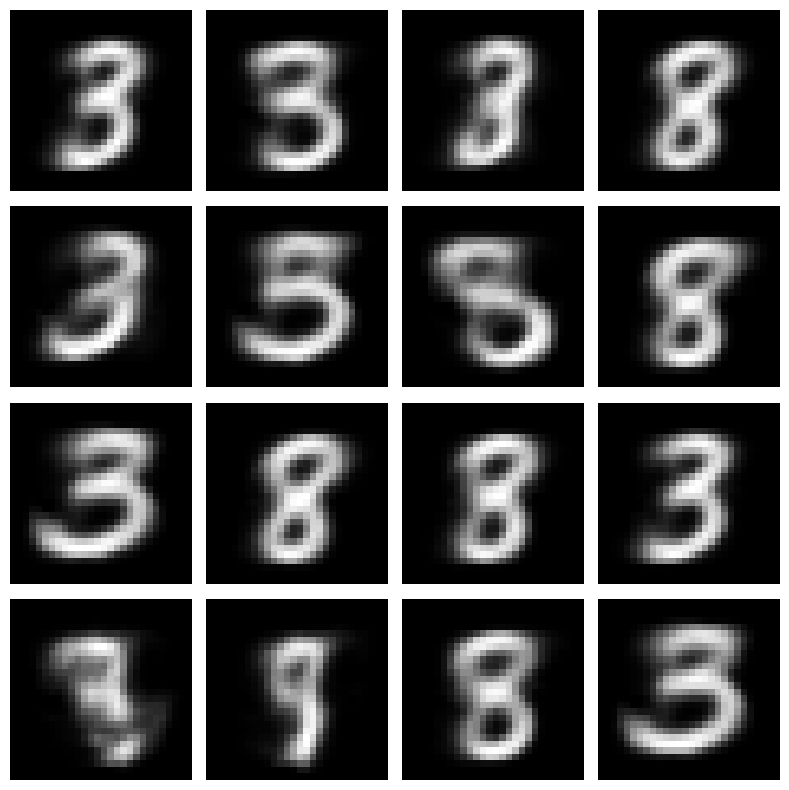

In [45]:
generate_images_from_noise(model.decoder)

<p class="task" id="4"></p>

4\. Создайте и обучите модель условного автокодировщика, используя только полносвязные слои и функции активации.

Отличие от предыдущего варианта заключается в том, что теперь функции кодировщика и декодировщика принимают на вход также метку класса:
$$z = f_\theta(x, c)$$
$$\hat{x} = g_\phi(z, c)$$

Таким образом, теперь во теперь время обучения метки классов используются. Задействуйте их следующим образом: представьте метки классов в виде one-hot кодировки и объедините с пикселями изображения (для этого адаптируйте размерность слоев).

Скрытое представление, полученное после части-кодировщика, должно иметь размерность 2. Последним слоем части-декодеровщика сделайте сигмоиду. В качестве функции потерь используйте `MSELoss` между исходным и восстановленным изображением $MSE(x, \hat{x})$.


- [ ] Проверено на семинаре

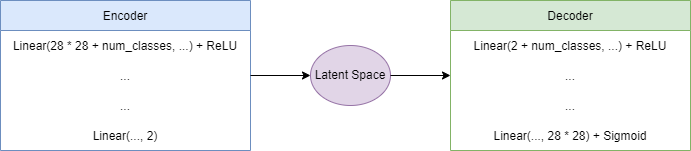

In [10]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28+10, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(2+10, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [11]:
model = Autoencoder().to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-4)
critertion = nn.MSELoss()

In [17]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    loss_train = 0
    for images, classes, in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} Train'):
        images = images.flatten(start_dim=1).to(device)

        batch_size = images.shape[0]
        class_onehot = th.zeros((batch_size, 10), device=device)
        class_onehot[th.arange(batch_size), classes] = 1

        inputs = th.cat([images, class_onehot], dim=1)
        encoder_out = model.encoder(inputs)
        inputs = th.cat([encoder_out, class_onehot], dim=1)
        decoder_out = model.decoder(inputs)

        loss = critertion(images, decoder_out)
        loss_train += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    loss_val = 0
    with th.no_grad():
        for images, classes, in tqdm(test_loader, desc=f'Epoch {epoch+1}/{num_epochs} Val'):
            images = images.flatten(start_dim=1).to(device)

            batch_size = images.shape[0]
            class_onehot = th.zeros((batch_size, 10), device=device)
            class_onehot[th.arange(batch_size), classes] = 1

            inputs = th.cat([images, class_onehot], dim=1)
            encoder_out = model.encoder(inputs)
            inputs = th.cat([encoder_out, class_onehot], dim=1)
            decoder_out = model.decoder(inputs)

            loss = critertion(images, decoder_out)
            loss_val += loss.item()
    
    print(f'  - Train Loss: {loss_train / len(train_loader):.4f} Val Loss: {loss_val / len(test_loader):.4f}')

Epoch 1/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1003.77it/s]


  - Train Loss: 0.0521 Val Loss: 0.0438


Epoch 2/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 998.70it/s] 


  - Train Loss: 0.0413 Val Loss: 0.0390


Epoch 3/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1000.57it/s]


  - Train Loss: 0.0379 Val Loss: 0.0370


Epoch 4/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 995.32it/s]


  - Train Loss: 0.0363 Val Loss: 0.0359


Epoch 5/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 999.79it/s] 


  - Train Loss: 0.0355 Val Loss: 0.0354


Epoch 6/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 999.57it/s] 


  - Train Loss: 0.0349 Val Loss: 0.0349


Epoch 7/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1001.90it/s]


  - Train Loss: 0.0345 Val Loss: 0.0345


Epoch 8/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1000.58it/s]


  - Train Loss: 0.0342 Val Loss: 0.0342


Epoch 9/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1002.34it/s]


  - Train Loss: 0.0339 Val Loss: 0.0341


Epoch 10/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 997.32it/s]


  - Train Loss: 0.0337 Val Loss: 0.0339


Epoch 11/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1001.33it/s]


  - Train Loss: 0.0335 Val Loss: 0.0337


Epoch 12/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1000.33it/s]


  - Train Loss: 0.0333 Val Loss: 0.0336


Epoch 13/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1004.89it/s]


  - Train Loss: 0.0332 Val Loss: 0.0335


Epoch 14/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1002.51it/s]


  - Train Loss: 0.0330 Val Loss: 0.0333


Epoch 15/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1000.62it/s]


  - Train Loss: 0.0329 Val Loss: 0.0333


Epoch 16/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1000.53it/s]


  - Train Loss: 0.0328 Val Loss: 0.0332


Epoch 17/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 992.68it/s]


  - Train Loss: 0.0327 Val Loss: 0.0331


Epoch 18/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 1003.23it/s]


  - Train Loss: 0.0326 Val Loss: 0.0331


Epoch 19/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 998.87it/s] 


  - Train Loss: 0.0326 Val Loss: 0.0331


Epoch 20/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 996.46it/s]

  - Train Loss: 0.0325 Val Loss: 0.0329


<p class="task" id="5"></p>

5\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения и one-hot представление цифры. Далее объединенный вектор пропускается его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

In [37]:
def generate_images_from_noise(decoder, label):
    noise = th.randn(16, 2, device=device)
    class_onehot = th.zeros((16, 10), device=device)
    class_onehot[th.arange(16), label] = 1
    
    inputs = th.cat([noise, class_onehot], dim=1)
    generated_images = decoder(inputs).cpu().detach().numpy().reshape(16, 28, 28)
    
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

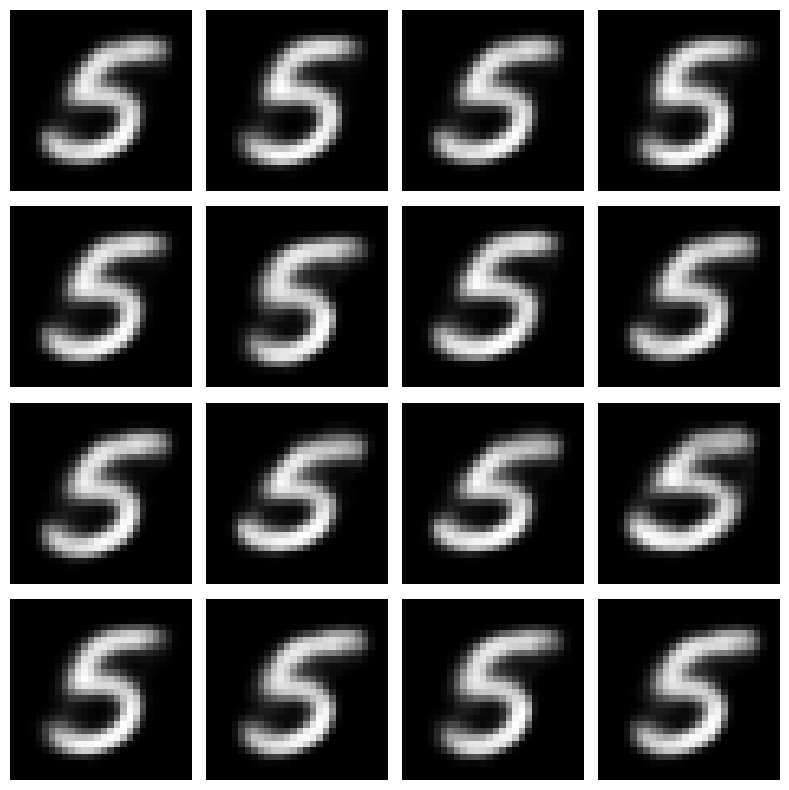

In [39]:
generate_images_from_noise(model.decoder, 5)

<p class="task" id="6"></p>

6\. Создайте и обучите модель вариационного автокодировщика, используя только полносвязные слои и функции активации.

Кодировщик - это функция следующего вида:
$$q_\phi(z|x) = \mathcal{N}(\mu_\phi(x), \sigma_\phi^2(x))$$

Здесь $\phi$ - параметры кодировщика, а $\mu_\phi(x)$ и $\sigma_\phi^2(x)$ - это обучаемые функции (в нашем случае - полносвязные слои).

Чтобы иметь возможность обучить такую модель, используется т.н. reparametrization trick: на основе функций $\mu$ и $ \sigma$ считаем значение:

$$z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)$$

Декодировщик пытается восстановить исходное изображение из полученного вектора:

$$p_\theta(x|z) = f(z; \theta)$$

В качестве функции потерь обычно используется следующая:
$$\mathcal{L}_{total} = \mathcal{L}_{recon} + D_{KL}$$
$$\mathcal{L}_{recon} = -\sum_{i=1}^D [x_i \log \hat{x}_i + (1 - x_i) \log (1 - \hat{x}_i)]$$
$$D_{KL} = -\frac{1}{2} \sum_{j=1}^J (1 + \log \sigma_j^2 - \mu_j^2 - \sigma_j^2)$$


- [ ] Проверено на семинаре

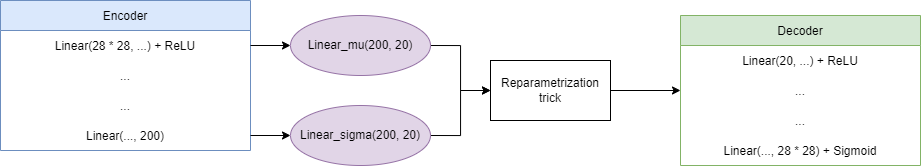

In [7]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 200),
        )

        self.linear_mu = nn.Linear(200, 20)
        self.linear_sigma = nn.Linear(200, 20)
        
        self.decoder = nn.Sequential(
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28),
            nn.Sigmoid(),
        )
    
    def reparameterize(self, mu, sigma):
        std = th.exp(0.5 * sigma)
        eps = th.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        encoded = self.encoder(x)
        mu = self.linear_mu(encoded)
        logvar = self.linear_sigma(encoded)
        z = self.reparameterize(mu, logvar)
        decoded = self.decoder(z)
        return decoded, mu, logvar

In [8]:
def loss_function(recon_x, x, mu, logvar):
    L1 = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    L2 = -0.5 * th.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return L1 + L2

In [9]:
model = VAE().to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-4)

In [10]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    loss_train = 0
    for images, classes, in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} Train'):
        images = images.flatten(start_dim=1).to(device)

        recon_batch, mu, logvar = model(images)
        loss = loss_function(recon_batch, images, mu, logvar)
        loss_train += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model.eval()
    loss_val = 0
    with th.no_grad():
        for images, classes, in tqdm(test_loader, desc=f'Epoch {epoch+1}/{num_epochs} Val'):
            images = images.flatten(start_dim=1).to(device)
            
            recon_batch, mu, logvar = model(images)
            loss = loss_function(recon_batch, images, mu, logvar)
            loss_val += loss.item()
    
    print(f'  - Train Loss: {loss_train / len(train_loader):.4f} Val Loss: {loss_val / len(test_loader):.4f}')

Epoch 1/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 960.41it/s]


  - Train Loss: 1338.3564 Val Loss: 1094.1829


Epoch 2/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 917.95it/s]


  - Train Loss: 1031.9968 Val Loss: 978.2990


Epoch 3/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 963.45it/s]


  - Train Loss: 963.0965 Val Loss: 937.3729


Epoch 4/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 960.30it/s]


  - Train Loss: 928.7952 Val Loss: 908.1562


Epoch 5/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 961.71it/s]


  - Train Loss: 907.0303 Val Loss: 889.5238


Epoch 6/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 967.49it/s]


  - Train Loss: 891.8888 Val Loss: 881.7453


Epoch 7/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 966.82it/s]


  - Train Loss: 881.8347 Val Loss: 868.8474


Epoch 8/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 960.45it/s]


  - Train Loss: 873.6388 Val Loss: 866.4252


Epoch 9/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 954.40it/s]


  - Train Loss: 867.4055 Val Loss: 859.2722


Epoch 10/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 932.28it/s]


  - Train Loss: 862.0147 Val Loss: 855.2006


Epoch 11/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 935.46it/s]


  - Train Loss: 857.6232 Val Loss: 853.2365


Epoch 12/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 932.99it/s]


  - Train Loss: 853.8645 Val Loss: 850.1742


Epoch 13/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 921.32it/s]


  - Train Loss: 850.2705 Val Loss: 846.6909


Epoch 14/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 921.60it/s]


  - Train Loss: 847.3053 Val Loss: 841.5360


Epoch 15/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 914.16it/s]


  - Train Loss: 844.4384 Val Loss: 843.8240


Epoch 16/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 928.19it/s]


  - Train Loss: 842.2802 Val Loss: 840.6973


Epoch 17/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 931.57it/s]


  - Train Loss: 839.7372 Val Loss: 839.2710


Epoch 18/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 920.01it/s]


  - Train Loss: 837.4654 Val Loss: 835.7552


Epoch 19/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 924.51it/s]


  - Train Loss: 835.8940 Val Loss: 837.4191


Epoch 20/20 Val: 100%|██████████| 1250/1250 [00:01<00:00, 933.78it/s]

  - Train Loss: 834.1496 Val Loss: 834.4900


<p class="task" id="7"></p>

7\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения. Далее вектор пропускается его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

In [19]:
def generate_images_from_noise(decoder):
    noise = th.randn(16, 20).to(device)
    generated = decoder(noise).cpu().detach().numpy().reshape(-1, 28, 28)
    
    fig, axes = plt.subplots(int(np.sqrt(16)), int(np.sqrt(16)), figsize=(8, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

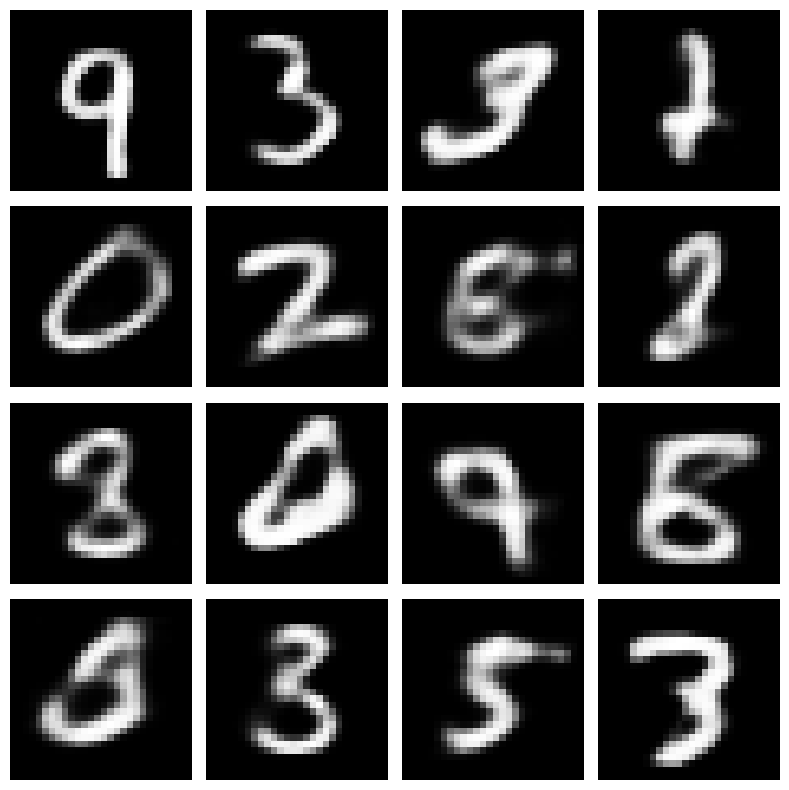

In [20]:
generate_images_from_noise(model.decoder)